<a href="https://colab.research.google.com/github/svdcvt/math_python_hse/blob/master/fall-2021/lectures/lecture11_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 11: визуализации с помощью Питона. Matplotlib-Seaborn-Plotly

Честно советуем сразу обратиться к туториалам с официальных сайтов бибилотек, чтобы не тратить время зря :) Мы не хотим изобретать велосипед. 

- https://matplotlib.org/stable/tutorials/index.html#
- https://seaborn.pydata.org/tutorial.html
- https://plotly.com/fsharp/plotly-fundamentals/


<img src="https://files.catbox.moe/wl8ps2.png" width="300"/> <img src="https://files.catbox.moe/k062v4.png" width="350"/> <img src="https://files.catbox.moe/k7z5af.png" width="300"/>

Картинки, графики, диаграммы и так далее - именно для этого созданы эти библиотеки. Уметь визуализировать информацию, результаты, статистику это ценный навык любого специалиста. Зная Питона - а мы его с вами прекрасно и полно изучили - пользоваться этими инструментами будет легко.

In [50]:
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

%matplotlib inline

## Линейные графики, правильное оформление графиков

## Matplotlib


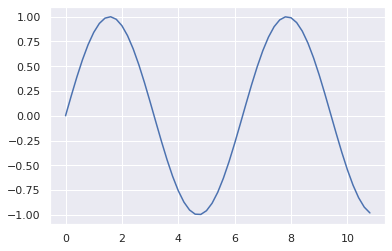

In [52]:
x_axis = [ x / 5 for x in range(0, 55)]
y_axis = [math.sin(x) for x in x_axis]

# функция plot из библиотеки matplotlib рисует линейные графики и принимает множество аргументов
# но обязательными являются два - точки на Х оси и У оси
plt.plot(x_axis, y_axis)
plt.show()

Чего не хватает на этом графике (да в принципе всего хватает, но чего не хватает для хорошего графика, понятного любому, кто не видел код, который его рисует, например)?
1. Подпись графика
2. Подпись осей
3. Сетки
4. *можно было бы сделать размер графика немного другим


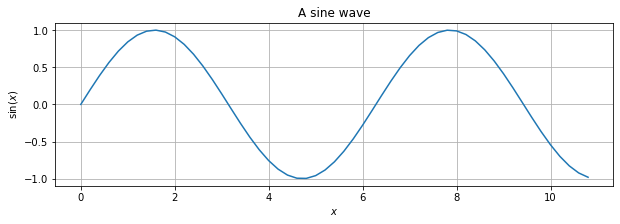

In [16]:
plt.figure(figsize=(10,3)) # меняем размер "фигуры", где "фигура" - место, где рисуются все графики, так сказать холст
plt.plot(x_axis, y_axis)
plt.title('A sine wave')
plt.xlabel('$x$') # подписываем ОХ
plt.ylabel('$\sin(x)$') # подписываем ОY
plt.grid(True)
plt.show()

Хм, лучше подравнять пределы осей и добавить больше точек (засечек) для ОХ.

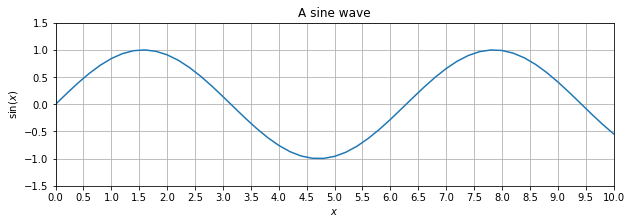

In [17]:
plt.figure(figsize=(10,3)) 
plt.plot(x_axis, y_axis)
plt.title('A sine wave')
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')

# показываем ось х от 0 до 10
plt.xlim(0, 10)
# показываем ось у от -1.5 до 1.5
plt.ylim(-1.5, 1.5)
# делаем засечки от 0 до 10 с шагом 0.5
plt.xticks([x/2 for x in range(0, 21)],  # указываются места куда ставить
           [str(x/2) for x in range(0, 21)])  # как подписывать засечки

plt.grid(True)
plt.show()

Сделаем засечки на местах $0$, $0.5 \pi$, $\pi$, $1.5 \pi$, $2 \pi$, $2.5 \pi$, $3 \pi$ и подпишем соответсвенно (matplotlib умеет в LaTex - подавайте строку со знаком $ как обычно)

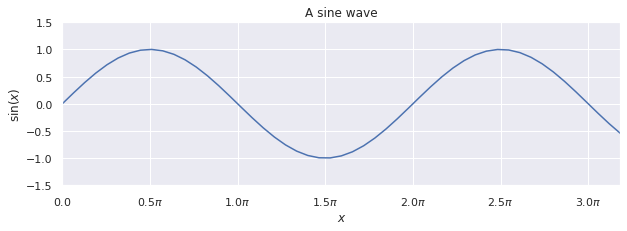

In [59]:
plt.figure(figsize=(10,3)) 
plt.plot(x_axis, y_axis)
plt.title('A sine wave')
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

locs = [x / 2 * math.pi for x in range(0, 7)]
text = ["${}{}$".format(x / 2, '\pi' if x != 0 else '') for x in range(0, 7)]
plt.xticks(locs, text)

plt.grid(True)
plt.show()

Очевидно, что получившийся график лучше, чем график ниже, особенно если это касается каких-то неочевидных функций/значений

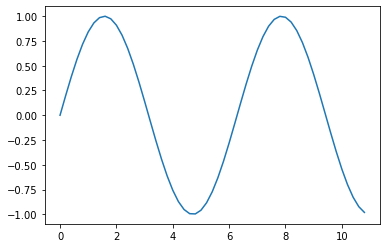

In [32]:
plt.plot(x_axis, y_axis)
plt.show()

## Plotly & Seaborn

Эти библиотеки больше раюотают именно с pandas DataFrame объектами. Создадим такой для линейного графика.

In [44]:
df = pd.DataFrame({'x':x_axis, 'y':y_axis})
df.head()

,x,y
0,0.0,0.000000
1,0.2,0.198669
2,0.4,0.389418
3,0.6,0.564642
4,0.8,0.717356


In [40]:
fig = px.line(df, x="x", y="y", title='A sine wave', height=400, width=500)
fig.show()

Особенность библиотеки plotly - её интерактивность. 

<img src="https://files.catbox.moe/2toob7.png" width="300"/>

Однако в GitHub вы скорее всего это не увидите, необходимо открыть Colab.

В случае с Seaborn все еще не менее интереснее - он отлично умеет показывать табличные данные с несколькими признаковыми столбцами. У него есть параметры `x` и `y`, которые отвечают за сами данные, которые надо отобразить, а так же `hue`, `size` и `style`, которые в случае категориальных данных помогают сгруппировать данные с помощью этих значений и отобазить их разным цветом, шириной и стилем линий.


In [48]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# загрузим пример датасета
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


[]

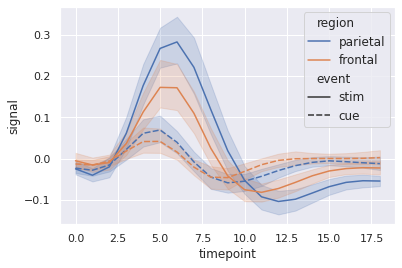

In [53]:
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)
plt.plot()

## Визуализация нескольких графиков на одном



### Одновременно


Достаточно для одного "холста" вызвать функцию `plt.plot` столько раз сколько необходимо, остальные функции "для красоты" буду применяться к "холсту".

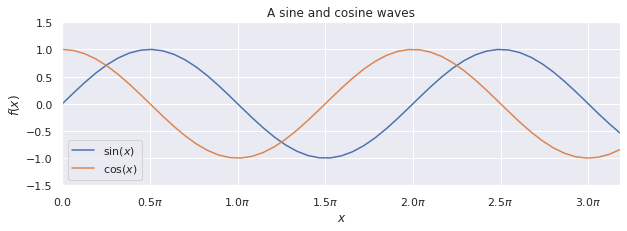

In [60]:
# это самый простой и быстрый способ, хотя есть более правильный
y_axis_cos = [math.cos(x) for x in x_axis]
y_axis_sin = y_axis
plt.figure(figsize=(10,3)) 

plt.plot(x_axis, y_axis_sin, label='$\sin(x)$') # синус
plt.plot(x_axis, y_axis_cos, label='$\cos(x)$') # косинус

plt.title('A sine and cosine waves')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(0, 10) 
plt.ylim(-1.5, 1.5) 
plt.xticks(locs, text)
plt.grid(True)

plt.legend() # легенда какой график чему соответствует (работает если у графиков указаны параметры label) 

plt.show()

Все параметры функции `plot` можно посмотреть тут: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Вы почти никогда не сможете выучить наизусть, как рисовать красивые-особенные графики, вам всегда __придется__ гуглить. Мы это делаем абсолютно постоянно. Мы не сможем показать абсолютно всё в одном туториале, к сожалению.


### Рядом

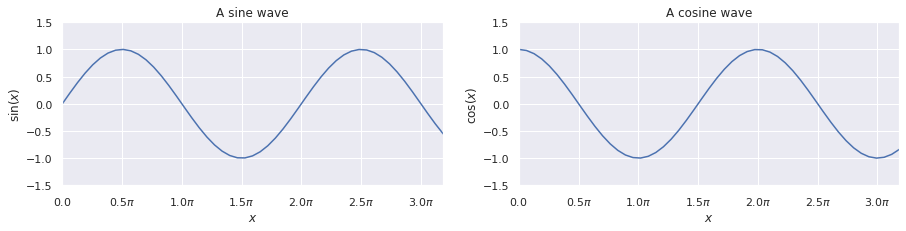

In [62]:
plt.figure(figsize=(15,3))

# subplot(сколько строк графиков, сколько в каждой строке графиков, 
# номер места куда ставить график который будет рисоваться далее)
plt.subplot(1, 2, 1) 


plt.plot(x_axis, y_axis_sin) # синус
plt.title('A sine wave')
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')
plt.xlim(0, 10) 
plt.ylim(-1.5, 1.5) 
plt.xticks(locs, text)
plt.grid(True)

plt.subplot(1, 2, 2)

plt.plot(x_axis, y_axis_cos) # косинус
plt.title('A cosine wave')
plt.xlabel('$x$')
plt.ylabel('$\cos(x)$')
plt.xlim(0, 10) 
plt.ylim(-1.5, 1.5) 
plt.xticks(locs, text)
plt.grid(True)

plt.show()

## Нелинейный графики

Видов нелинейных график целове множество - гистограммы (histplot), столбчатые диаграммы (barplot), графики рассеивания (scatterplot), violin plot, box plot... Все они показывают разные виды статистики. Scatter обычно показывает зависимости переменных. Гистограммы - распределение одной величины. Барплоты - сравнение нескольких величин. Violin, box - сравнение распределений и отображение outliers. Все они нужны! И выбрать правильный график - основа навыка визуализации.

In [64]:
# загрузим данные, чтобы нам было что визуализировать
dataset = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


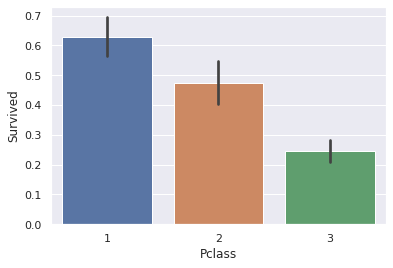

In [65]:
sns.barplot(x='Pclass', y='Survived', data=dataset)
plt.show()

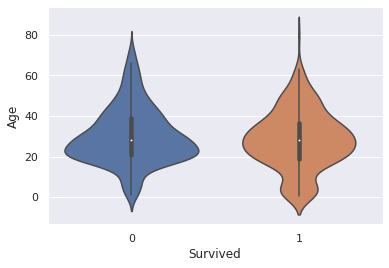

In [75]:
sns.violinplot(x='Survived', y='Age', data=dataset)
plt.show()

[]

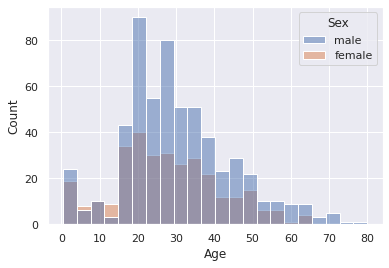

In [80]:
sns.histplot(x='Age', hue='Sex', data=dataset)
plt.plot()

In [ ]:
# вспомним наши велосипеды
!wget -O -qq data.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip 
!unzip -q data.zip

In [83]:
data = pd.read_csv('hour.csv')

[]

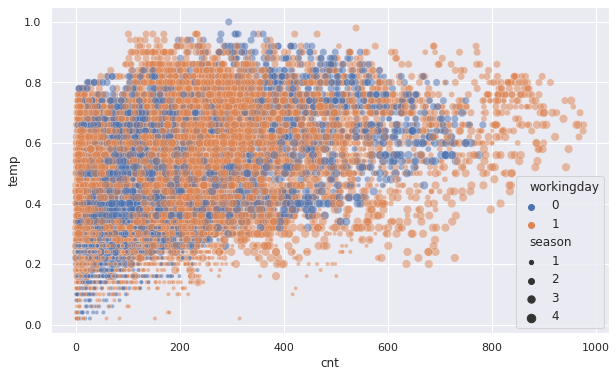

In [91]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='cnt', y='temp', hue='workingday', size='season', alpha=0.5)
plt.plot()

Скажите, же, из этих всех графиков можно очень многое понять о данных, да? :)